In [2]:
import numpy as np
import pandas as pd

In [8]:
# load datasets
df = pd.read_csv("C:/Users/Sneha Gupta/Downloads/historical_data.csv")
df1 = pd.read_csv("C:/Users/Sneha Gupta/Downloads/fear_greed_index.csv")

In [9]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [10]:
df1

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [11]:
# seperate the column time and date in historical data
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format='%d-%m-%Y %H:%M')
df['Time'] = df['Timestamp IST'].dt.time
df['date'] = df['Timestamp IST'].dt.date

df1['Date'] = pd.to_datetime(df1['date']).dt.date

In [13]:
# merge both dataset
merge = pd.merge(df,df1, left_on = 'date',right_on = 'Date', how = 'inner')
print(merge)

                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211213  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211214  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211215  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211216  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211217  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size U

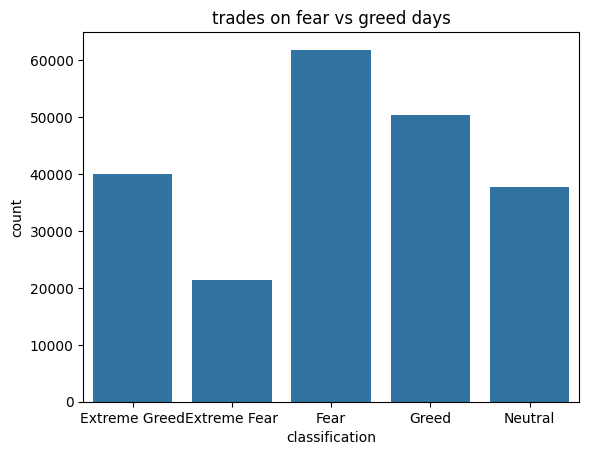

In [14]:
# the count of fear, greed days 
import seaborn as s
import matplotlib.pyplot as plt
s.countplot(data =merge, x = 'classification')
plt.title('trades on fear vs greed days')
plt.show()

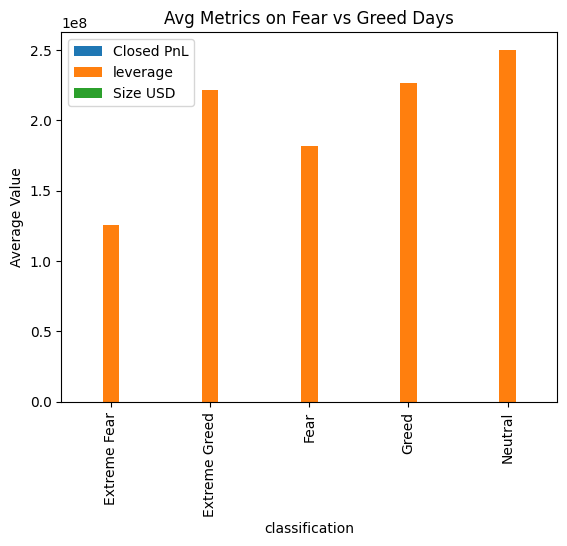

In [26]:
# check leverage performannce on fear, greed day
merge['leverage'] = merge['Size USD']/(merge['Start Position'] + 1e-6)
metrics = merge.groupby('classification')[['Closed PnL','leverage','Size USD']].mean()
metrics.plot(kind='bar', title='Avg Metrics on Fear vs Greed Days')
plt.ylabel('Average Value')
plt.show()
# merge.shape

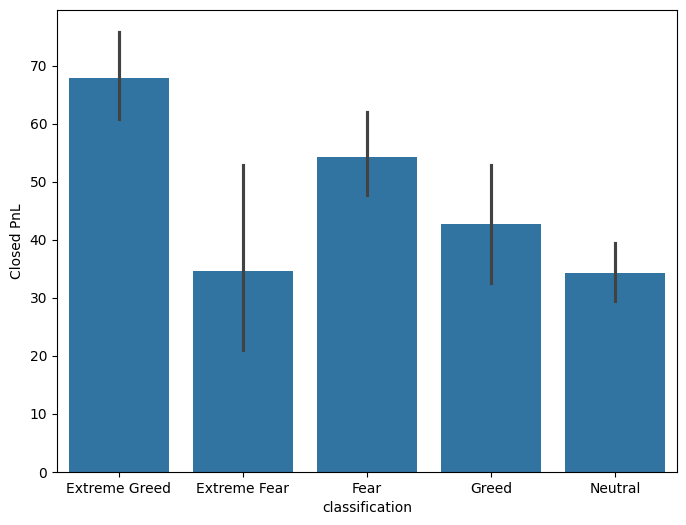

In [30]:
# check profit done on classification days
plt.figure(figsize = (8,6))
s.barplot(data =merge, x= 'classification', y='Closed PnL')
plt.show()

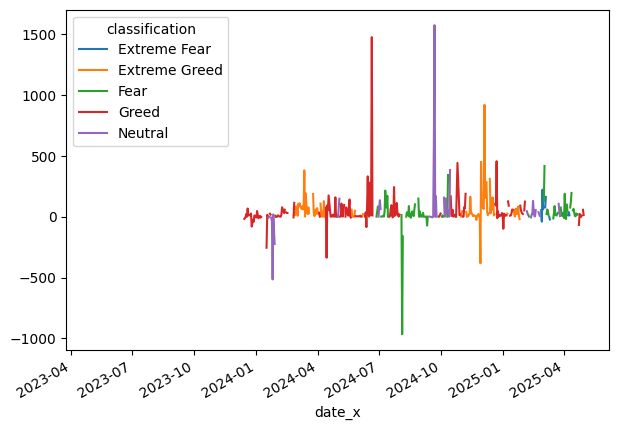

In [24]:
# based on date and classification what is the profit
merge['date_x'] = pd.to_datetime(merge['date_x'])
daily_perf = merge.groupby(['date_x','classification'])['Closed PnL'].mean().unstack()
daily_perf.plot(figsize = (7,5))
plt.show()

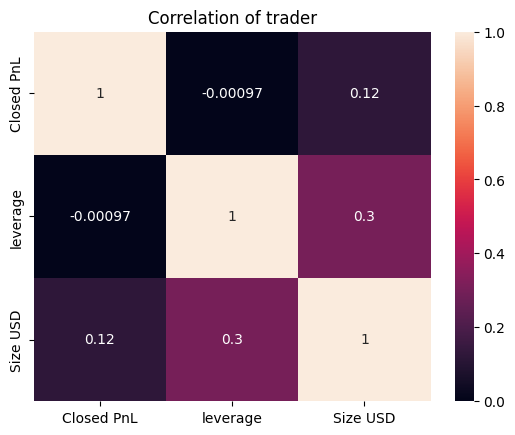

In [25]:
# relationship blw closed pnl,leverage, size usd
plt.figure()
corr = merge[['Closed PnL','leverage','Size USD']].corr()
s.heatmap(corr, annot= True)
plt.title('Correlation of trader')
plt.show()